# Fixmystreet Ireland
http://fixmystreet.ie/

In [79]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Plotly offline in notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Read in Data

In [80]:
file = 'data\\fixmystreet_list_ie_2018-09-27_02-23.csv'

In [81]:
dat = pd.read_csv(file, encoding='Latin-1')
dat.head()

,index,id,title,category,comment
0,0,100,Potholes in Allenwood South,Road or path defects,"Hi, I live in Allenwood South (L70044), my hou..."
1,1,10000,Street Light,Street Lighting,Street light not working
2,2,10001,Ditch removal,Tree and Grass Maintenance,Ditch trees and brambles recently removed by t...
3,3,10002,Street Light,Street Lighting,Street light not working
4,4,10003,Street Light,Street Lighting,Street light not working at this location


In [82]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23090 entries, 0 to 23089
Data columns (total 5 columns):
index       23090 non-null int64
id          23090 non-null int64
title       23089 non-null object
category    23089 non-null object
comment     23089 non-null object
dtypes: int64(2), object(3)
memory usage: 902.0+ KB


In [84]:
# Description lengths
dat['descript_char_len'] = dat['comment'].map(lambda x: len(str(x)))
dat['descript_word_len'] = dat['comment'].map(lambda x: len(str(x).split()))

In [85]:
dat.describe()

,index,id,descript_char_len,descript_word_len
count,23090.000000,23090.000000,23090.000000,23090.000000
mean,11544.500000,14665.085751,141.109008,25.283586
std,6665.653194,7378.400500,129.450020,23.470079
min,0.000000,16.000000,1.000000,1.000000
25%,5772.250000,8497.250000,63.000000,11.000000
50%,11544.500000,14788.500000,106.000000,19.000000
75%,17316.750000,21016.750000,180.000000,32.000000
max,23089.000000,27206.000000,3020.000000,519.000000


## Comment Length
These stats do not exclude stop words.
The average number of characters words in the comments is 141 and 25, respectively. The medians are 106 and 19, respectively.

## Histogram of Comment Character Lengths

In [7]:
# Character length
iplot([go.Histogram(x=dat['descript_char_len'])], filename='basic histogram')

## Histogram of Comment Word Counts

In [8]:
# Words
iplot([go.Histogram(x=dat['descript_word_len'])], filename='basic histogram')

## Include English Stop Words

In [50]:
# Load Stanford NLP stopwords.
# https://github.com/stanfordnlp/CoreNLP/blob/master/data/edu/stanford/nlp/patterns/surface/stopwords.txt
stopwords_file = 'data\\stopwords.txt'

with open(stopwords_file, 'r') as f:
    x = f.read().splitlines() 
    
en_stopwords = list(x)

In [61]:
# Merge all comments into a long lower case string.
comment_word_list = dat['comment'].map(str).map(str.lower).sum()

In [62]:
# Store as pd.Series.
comment_words = pd.Series(comment_word_list.split())

## Raw Word Counts
Stop words such as 'the' show up most frequently in the raw text. We'll strip those out next.

In [63]:
comment_words.value_counts()

the                       32423
and                       14707
of                        13995
to                        13179
is                        13048
on                        12178
a                         10531
in                         8901
road                       7182
at                         6172
not                        5445
are                        5364
this                       5307
it                         4987
light                      4581
for                        4418
has                        4020
be                         3827
been                       3404
street                     3370
as                         3219
from                       3091
outside                    3088
have                       3031
there                      2689
with                       2435
no                         2359
number                     2318
very                       2146
out                        1986
                          ...  
l5548   

In [86]:
# Filter out stop words.
comment_words_filtered = comment_words[~comment_words.isin(en_stopwords)]

Updated word counts with stop words removed show road-related words top the list as expected given the data source.

In [65]:
comment_words_filtered.value_counts()

road                      7182
light                     4581
street                    3370
outside                   3088
number                    2318
lights                    1819
working                   1782
dumped                    1735
side                      1539
park                      1506
rubbish                   1458
please                    1433
needs                     1405
also                      1308
dangerous                 1240
area                      1234
left                      1221
lane                      1189
large                     1172
along                     1159
traffic                   1137
car                       1061
green                     1058
entrance                  1050
broken                    1036
house                     1025
now                       1014
potholes                   987
junction                   934
need                       917
                          ... 
parkat                       1
rugosa  

## Word Cloud
http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

In [66]:
from wordcloud import WordCloud

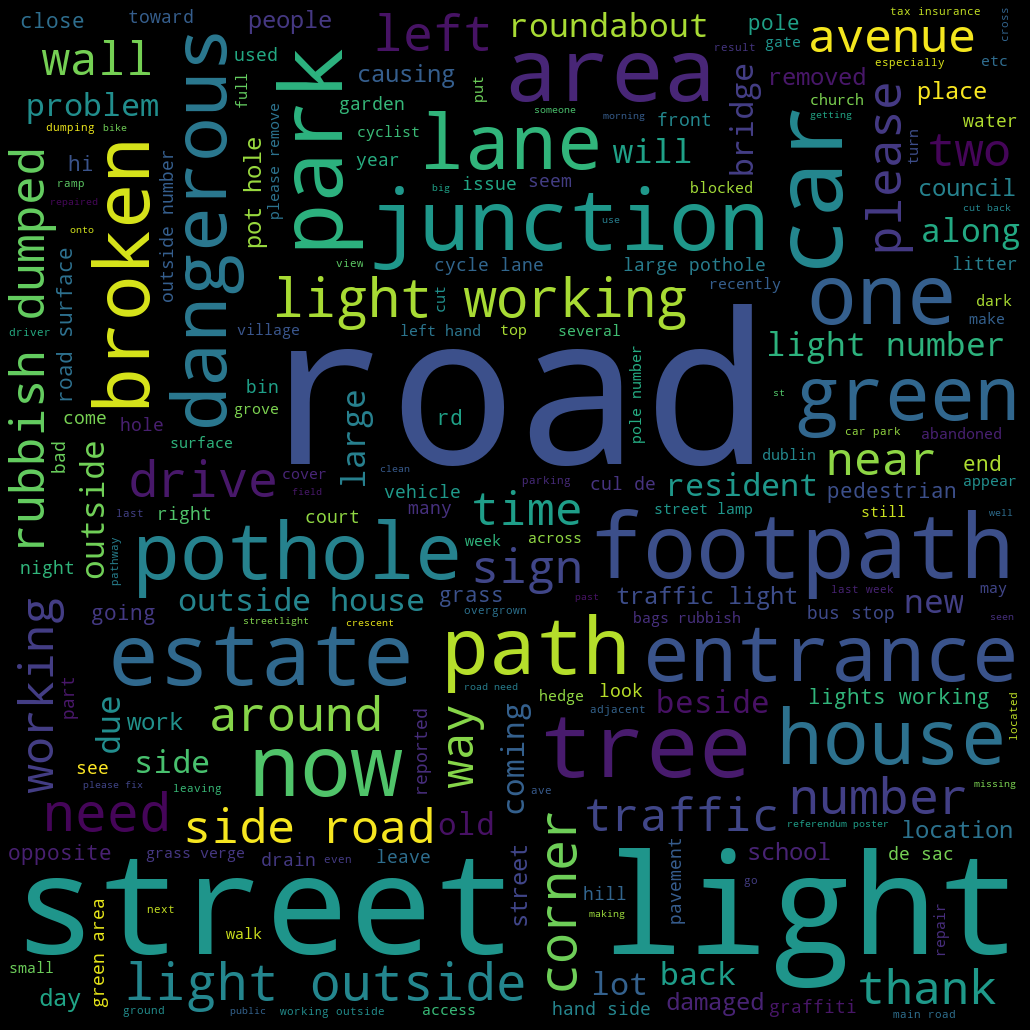

In [78]:
# Create the wordcloud object
wordcloud = WordCloud(width=1030, height=1030, margin=15).generate(' '.join(comment_words_filtered.tolist()))

# wordcloud.savefig('ie_wordcloud.png')
wordcloud.to_image()

# Unique Titles & Categories
In FixMyStreet these categories are user-chosen when submitting a complaint. The list is set up by whichever local authority has taken ownership. Complaints can be made by residents without a government agency taking ownership however. In those cases the only category should be General.

Some items below appear to be different names for the same things. This is most probably due to different counties choosing their own verbiage independently.

In [102]:
ie_categories = pd.DataFrame(dat['category'].value_counts())
ie_categories

,category
Street Lighting,7135
Road or path defects,6865
Litter and Illegal Dumping,5421
Tree and Grass Maintenance,2006
Leaks and Drainage,847
Graffiti,688
Road Maintenance/Potholes,74
Broken Street Lights,30
Road maintenance or potholes,8
Broken Street Paths,5


In [103]:
# Save to .csv
ie_categories.to_csv('output\\ireland_fix_my_street_categories.csv')

# Standardize Dataframe to Match Other Data

In [10]:
dat['COMPLAINT_ID'] = dat['id'].map(lambda x: 'ireland_' + str(x))

In [11]:
dat = dat.rename({'title':'COMPLAINT_1', 'comment': 'COMPLAINT_2', 'category': 'CODE_311'}, axis='columns')

In [12]:
dat.head()

,index,id,COMPLAINT_1,CODE_311,COMPLAINT_2,descript_char_len,descript_word_len,COMPLAINT_ID
0,0,100,Potholes in Allenwood South,Road or path defects,"Hi, I live in Allenwood South (L70044), my hou...",732,137,ireland_100
1,1,10000,Street Light,Street Lighting,Street light not working,24,4,ireland_10000
2,2,10001,Ditch removal,Tree and Grass Maintenance,Ditch trees and brambles recently removed by t...,204,34,ireland_10001
3,3,10002,Street Light,Street Lighting,Street light not working,24,4,ireland_10002
4,4,10003,Street Light,Street Lighting,Street light not working at this location,41,7,ireland_10003


In [13]:
dat = dat.drop(['index', 'id'], axis='columns')
dat.head()

,COMPLAINT_1,CODE_311,COMPLAINT_2,descript_char_len,descript_word_len,COMPLAINT_ID
0,Potholes in Allenwood South,Road or path defects,"Hi, I live in Allenwood South (L70044), my hou...",732,137,ireland_100
1,Street Light,Street Lighting,Street light not working,24,4,ireland_10000
2,Ditch removal,Tree and Grass Maintenance,Ditch trees and brambles recently removed by t...,204,34,ireland_10001
3,Street Light,Street Lighting,Street light not working,24,4,ireland_10002
4,Street Light,Street Lighting,Street light not working at this location,41,7,ireland_10003


In [14]:
dat = dat[['COMPLAINT_ID', 'CODE_311', 'COMPLAINT_1', 'COMPLAINT_2']]
dat.head()

,COMPLAINT_ID,CODE_311,COMPLAINT_1,COMPLAINT_2
0,ireland_100,Road or path defects,Potholes in Allenwood South,"Hi, I live in Allenwood South (L70044), my hou..."
1,ireland_10000,Street Lighting,Street Light,Street light not working
2,ireland_10001,Tree and Grass Maintenance,Ditch removal,Ditch trees and brambles recently removed by t...
3,ireland_10002,Street Lighting,Street Light,Street light not working
4,ireland_10003,Street Lighting,Street Light,Street light not working at this location


In [15]:
dat.to_csv('output\ireland_fix_my_street.csv')